# Conjecture de Syracuse

On s'intéresse ici à la conjecture de Syracuse. Elle fait intervenir la suite suivante :

* $u_0 \in \mathbb{N}^*$
* $\forall n \in \mathbb{N}, u_{n+1} = \frac{u_n}{2} \text{ si $u_n$ est pair, } 3\times u_n + 1 \text{ sinon.}$

La conjecture de Syracuse est :
$$\forall u_0 \in \mathbb{N}^*, \exists n \in\mathbb{N}, u_n = 1$$

Elle n'est toujours pas statuée à ce jour, et nous allons ici explorer avec Python quelque uns de ses comportements.


## Génération de la suite de Syracuse

On commence par coder une fonction qui va nous renvoyer les $n$ premiers termes de la suite avec comme point de départ $u_0$.

In [3]:
def syracuse_sequence(initial, n):
    sequence = [initial]
    value = initial
    
    for iteration in range(n):
        value = int(value / 2) if value % 2 == 0 else 3 * value + 1
        sequence.append(value)
    
    return sequence

Regardons les 15 premieres valeurs de la suite pour $u_0=5$

In [4]:
syracuse_sequence(5, 15)

[5, 16, 8, 4, 2, 1, 4, 2, 1, 4, 2, 1, 4, 2, 1, 4]

Comme on pouvait s'y attendre la suite touche 1, et une fois que ce nombre est touché il boucle : $1 \rightarrow 4 \rightarrow 2 \rightarrow 1$.

## Temps de vol

Ainsi, il pourrait être intéressant de calculer le nombre d'itérations pour une valeur initiale qui permet d'atteindre la valeur 1. C'est appelé le *temps de vol* dans le jargon de la suite de syracuse.

In [5]:
def fly_time(initial):
    value = initial
    time = 0
    while value != 1:
        value = int(value / 2) if value % 2 == 0 else 3 * value + 1
        time += 1
    return time

Dans l'exemple que nous avions pris, nous avons un temps de vol de 5 pour un départ à 5. Vérifions :

In [6]:
fly_time(5)

5

Nous pouvons donc maintenant produire un graphique des temps de vol pour chaque valeur initiale.

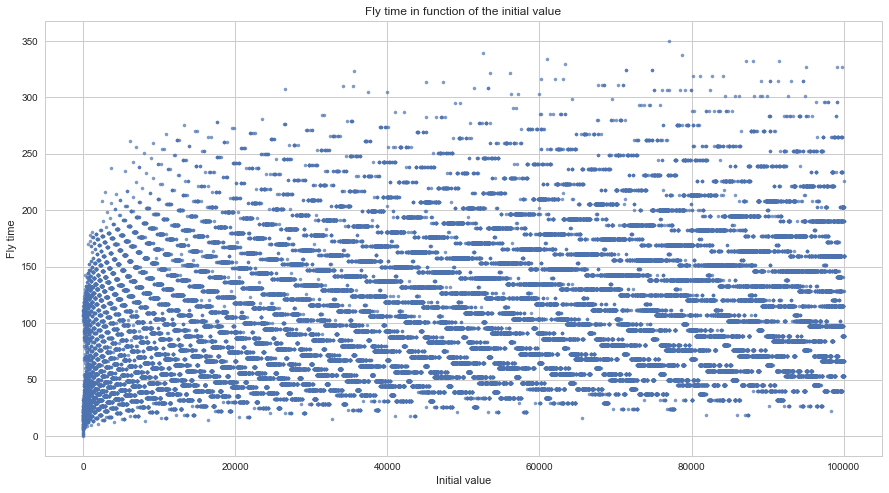

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")


max_initial_value = 100000
initial_values = [value for value in range(1, max_initial_value)]
fly_times = [fly_time(initial_value) for initial_value in initial_values]




plt.figure(figsize=(15, 8))

plt.scatter(initial_values, fly_times, s=10, alpha=0.7)
plt.xlabel("Initial value")
plt.ylabel("Fly time")
plt.title("Fly time in function of the initial value")
plt.show()

## Altitude maximale

Nous pouvons aussi regarder quel est le nombre le plus grand qui a été touché lors de la génération de la suite. 

In [33]:
def max_height(initial):
    value = initial
    maximum = initial
    
    
    while value != 1:
        value = int(value / 2) if value % 2 == 0 else 3 * value + 1
        
        if value > maximum:
            maximum = value
            
              
    return maximum

L'altitude maximale pour $u_0=5$ est 16. Vérifions :

In [34]:
max_height(5)

16

A nouveau, nous pouvons faire un graphe pour afficher l'altitude maximale atteinte par une valeur initiale.

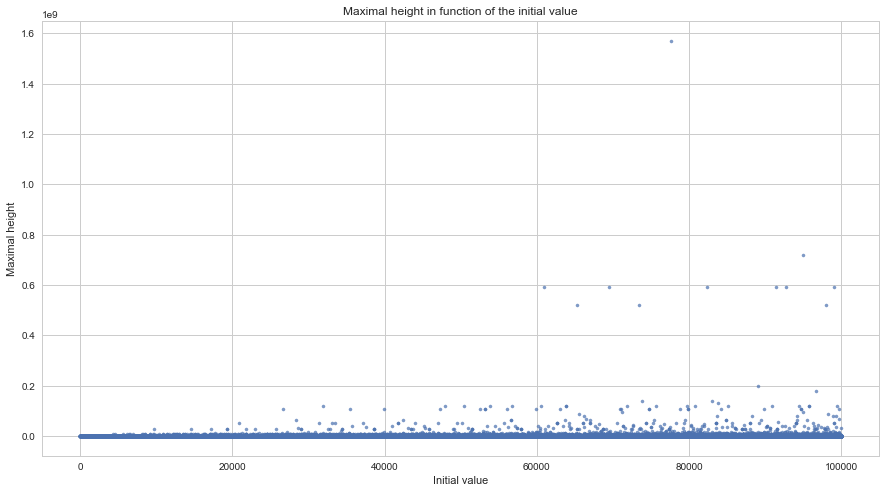

In [36]:
max_initial_value = 100000
initial_values = [value for value in range(1, max_initial_value)]
max_heights = [max_height(initial_value) for initial_value in initial_values]




plt.figure(figsize=(15, 8))

plt.scatter(initial_values, max_heights, s=10, alpha=0.7)
plt.xlabel("Initial value")
plt.ylabel("Maximal height")
plt.title("Maximal height in function of the initial value")
plt.show()

On voit qu'un nombre a atteint une altitude très élevée. Cherchons le :

In [41]:
maximal_height = max(max_heights)
maximal_height_index = max_heights.index(maximal_height)

print("The initial condition u_0 = %d give the maximal height : %d" % (maximal_height_index + 1, maximal_height))

The initial condition u_0 = 77671 give the maximal height : 1570824736


Il peut être intéressant de regarder le nombre de fois où l'altitude maximal a été $\alpha$ fois plus importante que la valeur initiale. Regardons :

In [54]:
mean = lambda vector: sum(vector) / len(vector)



def above_takeoff(max_heights, alpha):
    realisations = [1 if max_heights[i] > alpha * (i+1) else 0 for i in range(len(max_heights))]
    return mean(realisations)

Regardons pour plusieurs valeurs de $\alpha$ la proportion de suite qui ont atteint une altitude maximale au moins $\alpha$ fois supérieure à la valeur de départ.

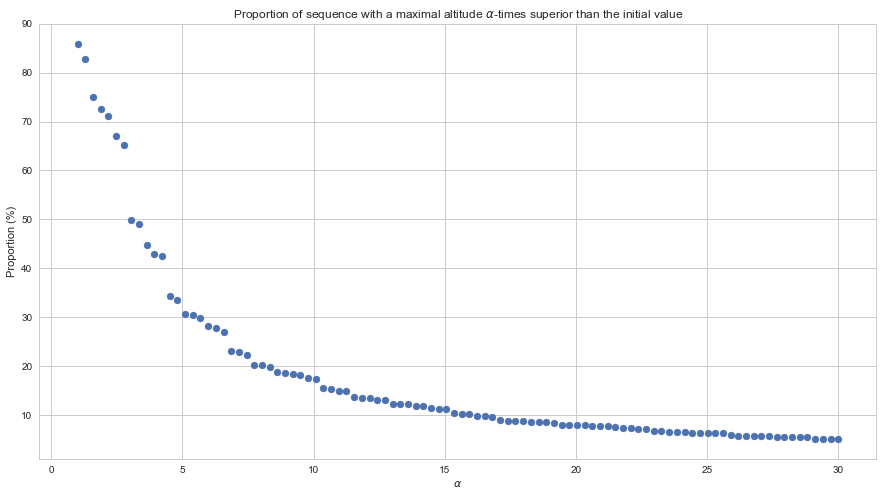

In [61]:
import numpy as np


alpha_values = np.linspace(start=1, stop=30, num=100)
proportions = [above_takeoff(max_heights, alpha) * 100 for alpha in alpha_values]

plt.figure(figsize=(15, 8))
plt.scatter(alpha_values, proportions)
plt.xlabel(r"$\alpha$")
plt.ylabel("Proportion (%)")
plt.title(r"Proportion of sequence with a maximal altitude $\alpha$-times superior than the initial value")
plt.show()

Nous pourrions encore continuer longtemps d'étudier numériquement cette suite, mais nous allons arrêter l'étude sur la remarque suivante.

Supposons que nous soyons des joueurs peu doué en calcul mental, et que nous ne soyons capable à partir d'un nombre de ne calculer que la prochaine itération via la suite de Syracuse.
Sous cette contrainte, ne pourrions-nous pas tirer parti de la théorie du contrôle optimal des chaînes de Markov pour le jeu qui consisterai à suivre la séquence des nombres générés par la suite, et à chaque itération le choix est laissé au joueur : prendre ce nombre et arrêter de jouer ou continuer. Le but est bien évidemment de maximiser le gain.


Je ne sais pas si le problème est bien posé ou non, mais il me semble intéressant.